#### Time Series Components

A useful abstraction for selecting forecasting methods is to break a time series down into systematic and unsystematic components.

+ Systematic: Components of the time series that have consistency or recurrence and can be described and modeled.
+ Non-Systematic: Components of the time series that cannot be directly modeled.  

A given time series =  systematic components（level, trend, seasonality）+  non-systematic component （noise）.

+ Level: The average value in the series.
+ Trend: The increasing or decreasing value in the series.
+ Seasonality: The repeating short-term cycle in the series.
  - A linear seasonality has the same frequency (width of cycles) and amplitude (height of cycles).  
  - A non-linear seasonality has an increasing or decreasing frequency and/or amplitude over time.
+ Noise: The random variation in the series.

All series have a level and noise. The trend and seasonality components are optional

+ Addictive Model  
y(t) = Level + Trend + Seasonality + Noise  
+ Multiplicative Model   
y(t) = Level * Trend * Seasonality * Noise

#### 自动时间序列分解

#### Reference：
- http://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

##### 1. 先看时间序列的总趋势，是addictive 还是multiplicative

#### 时间序列分解
 time series after the trend, and seasonal components are removed
 
 + 如何度量分解的好坏？

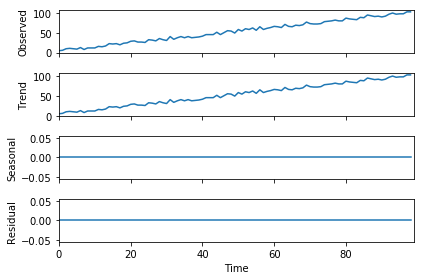

In [5]:
from random import randrange
# from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = [i+randrange(10) for i in range(1,100)]
# 因为是array，而不是Pandas Series object，所以需要加上freq=1参数
result = seasonal_decompose(series, model='additive', freq=1)
result.plot()
pyplot.show()

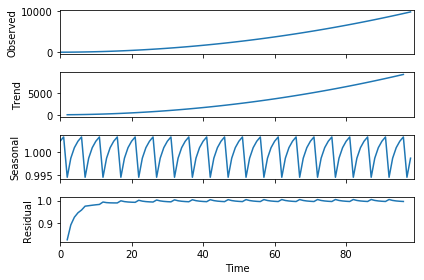

In [49]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = [i**2.0 for i in range(1,100)]
result = seasonal_decompose(series, model='multiplicative', freq=5)
# result = seasonal_decompose(series, model='addictive', freq=5)
result.plot()
pyplot.show()

从上面分解的图中可以看出，原生(经典)的statsmodels.tsa.seasonal import seasonal_decompose方法并没有分解出我们加入时间序列的Noise
尝试高级的分解方法, like Seasonal and Trend decomposition using Loess or STL decomposition.
http://www.statsmodels.org/stable/release/version0.6.html?highlight=seasonal#seasonal-decomposition

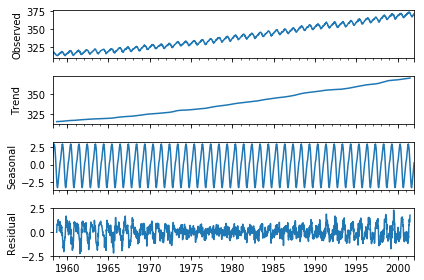

1958-03-29    316.10
1958-04-05    317.30
1958-04-12    317.60
1958-04-19    317.50
1958-04-26    316.40
1958-05-03    316.90
1958-05-10    317.20
1958-05-17    317.50
1958-05-24    317.90
1958-05-31    317.55
Freq: W-SAT, Name: co2, dtype: float64

In [45]:
import statsmodels.api as sm
from matplotlib import pyplot
dta = sm.datasets.co2.load_pandas().data
# deal with missing values. see issue
dta.co2.interpolate(inplace=True)
res = sm.tsa.seasonal_decompose(dta.co2)
resplot = res.plot()
pyplot.show()
# res.resid
# res.seasonal
# res.trend
dta.co2.head(10)

In [43]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

series = Series.from_csv('./data/international-airline-passengers.csv', header=0)
series.head(5)
# series.plot
# pyplot.show()
# result = seasonal_decompose(series, model='addictive')
# result.plot()
# pyplot.show()

# res = sm.tsa.seasonal_decompose(series, inferred_freq=1)
# resplot = res.plot()
# pyplot.show()


Month
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
Name: International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60, dtype: float64

In [9]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = Series.from_csv('./data/international-airline-passengers.csv', header=0)
print(series.index)
print(series.name)
# result = seasonal_decompose(series, model='multiplicative')
# result.plot()
# pyplot.show()

Index(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
       '1949-07', '1949-08', '1949-09', '1949-10',
       ...
       '1960-04', '1960-05', '1960-06', '1960-07', '1960-08', '1960-09',
       '1960-10', '1960-11', '1960-12',
       'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60'],
      dtype='object', name='Month', length=145)
International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60


Using TensorFlow backend.


Epoch 1/100
1s - loss: 0.0413
Epoch 2/100
0s - loss: 0.0201
Epoch 3/100
0s - loss: 0.0145
Epoch 4/100
0s - loss: 0.0131
Epoch 5/100
0s - loss: 0.0121
Epoch 6/100
0s - loss: 0.0111
Epoch 7/100
0s - loss: 0.0102
Epoch 8/100
0s - loss: 0.0093
Epoch 9/100
0s - loss: 0.0081
Epoch 10/100
0s - loss: 0.0071
Epoch 11/100
0s - loss: 0.0062
Epoch 12/100
0s - loss: 0.0053
Epoch 13/100
0s - loss: 0.0045
Epoch 14/100
0s - loss: 0.0038
Epoch 15/100
0s - loss: 0.0033
Epoch 16/100
0s - loss: 0.0029
Epoch 17/100
0s - loss: 0.0026
Epoch 18/100
0s - loss: 0.0024
Epoch 19/100
0s - loss: 0.0022
Epoch 20/100
0s - loss: 0.0022
Epoch 21/100
0s - loss: 0.0021
Epoch 22/100
0s - loss: 0.0021
Epoch 23/100
0s - loss: 0.0021
Epoch 24/100
0s - loss: 0.0021
Epoch 25/100
0s - loss: 0.0020
Epoch 26/100
0s - loss: 0.0021
Epoch 27/100
0s - loss: 0.0020
Epoch 28/100
0s - loss: 0.0020
Epoch 29/100
0s - loss: 0.0020
Epoch 30/100
0s - loss: 0.0021
Epoch 31/100
0s - loss: 0.0020
Epoch 32/100
0s - loss: 0.0020
Epoch 33/100
0s -

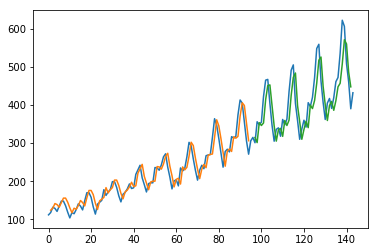

In [1]:
# LSTM for international airline passengers problem with regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('./data/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()